In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [4]:
train_dataset = torchvision.datasets.CIFAR10(
    root = '.',
    train=True,
    transform=transforms.ToTensor(),
    download = True
)
test_dataset = torchvision.datasets.CIFAR10(
    root = '.',
    train = False,
    transform = transforms.ToTensor(),
    download = True
)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
train_dataset, test_dataset

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [6]:
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [7]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [8]:
test_dataset.data.shape

(10000, 32, 32, 3)

In [9]:
train_dataset.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [10]:
len(train_dataset.targets)

50000

In [11]:
K = len(set(train_dataset.targets))
print("number of classes:", K)

number of classes: 10


In [12]:
#Data loader 
#Useful because it automatically generates batches in the training loop
#and take care of shuffling
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle = False)

In [13]:
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7fc371cbf3a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fc371cbfa60>)

In [14]:
# the data transform mapped the data to (0, 1)
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=1,shuffle=True)
for x, y in tmp_loader:
    print(x)
    print(x.shape)
    break

tensor([[[[0.9490, 0.9294, 0.9490,  ..., 0.9373, 0.9333, 0.9333],
          [0.9451, 0.9333, 0.9490,  ..., 0.9373, 0.9333, 0.9294],
          [0.9569, 0.9451, 0.9490,  ..., 0.9333, 0.9294, 0.9216],
          ...,
          [0.6745, 0.6549, 0.6588,  ..., 0.5098, 0.5059, 0.2706],
          [0.6235, 0.6196, 0.6235,  ..., 0.4980, 0.3647, 0.1686],
          [0.5882, 0.5765, 0.5765,  ..., 0.4314, 0.2196, 0.2157]],

         [[0.9333, 0.9098, 0.9294,  ..., 0.9176, 0.9137, 0.9137],
          [0.9294, 0.9137, 0.9294,  ..., 0.9176, 0.9137, 0.9098],
          [0.9373, 0.9294, 0.9373,  ..., 0.9098, 0.9098, 0.9020],
          ...,
          [0.2000, 0.1804, 0.1843,  ..., 0.0980, 0.1137, 0.1373],
          [0.1373, 0.1490, 0.1569,  ..., 0.0627, 0.1137, 0.1529],
          [0.1098, 0.1137, 0.1098,  ..., 0.0667, 0.1216, 0.2078]],

         [[0.8980, 0.8863, 0.9059,  ..., 0.9059, 0.9020, 0.9020],
          [0.8941, 0.8902, 0.9059,  ..., 0.9059, 0.9020, 0.8980],
          [0.9059, 0.9059, 0.9137,  ..., 0

In [15]:
tmp_loader

In [16]:
#Define the model
class CNN(nn.Module):
    def __init__(self, K):
        super(CNN, self).__init__()

        #define the conv layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size = 3, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size = 3, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size = 3, stride=2)

        #define the linear layers
        self.fc1 = nn.Linear(128 * 3 * 3, 1024)
        self.fc2 = nn.Linear(1024, K)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 128*3*3)
        x = F.dropout(x, p=0.5)
        x = F.relu(self.fc1(x))
        x = F.dropout(x , p=0.2)
        x = self.fc2(x)
        return x

In [17]:
#Instantiate the model
model = CNN(K)

In [18]:
model

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (fc1): Linear(in_features=1152, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [19]:
device = torch.device("cude:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (fc1): Linear(in_features=1152, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [20]:
#loss and optimize
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [21]:
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for it in range(epochs):
        model.train()
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            # Move data to device
            inputs, targets = inputs.to(device), targets.to(device)
            # Zero the gradients
            optimizer.zero_grad()
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            train_loss.append(loss.item())

        # Calculate average train loss
        train_loss = np.mean(train_loss)

        model.eval()
        test_loss = []
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        # Calculate average test loss
        test_loss = np.mean(test_loss)

        # Save losses
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        dt = datetime.now() - t0
        print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration: {dt}')

    return train_losses, test_losses

In [22]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_loader, test_loader, epochs = 10
)
train_losses, test_losses

Epoch 1/10, Train Loss: 1.7020, Test Loss: 1.4664, Duration: 0:00:52.249740
Epoch 2/10, Train Loss: 1.3925, Test Loss: 1.3561, Duration: 0:00:44.282044
Epoch 3/10, Train Loss: 1.2754, Test Loss: 1.2770, Duration: 0:00:50.455111
Epoch 4/10, Train Loss: 1.1806, Test Loss: 1.1874, Duration: 0:00:51.048010
Epoch 5/10, Train Loss: 1.1138, Test Loss: 1.1217, Duration: 0:00:54.793377
Epoch 6/10, Train Loss: 1.0576, Test Loss: 1.0890, Duration: 0:01:00.590084
Epoch 7/10, Train Loss: 1.0077, Test Loss: 1.0913, Duration: 0:01:07.661937
Epoch 8/10, Train Loss: 0.9673, Test Loss: 1.0645, Duration: 0:01:07.827732
Epoch 9/10, Train Loss: 0.9214, Test Loss: 1.0422, Duration: 0:01:04.430823
Epoch 10/10, Train Loss: 0.8883, Test Loss: 1.0464, Duration: 0:00:54.825310


(array([1.70199386, 1.39249699, 1.27536138, 1.18060432, 1.11380095,
        1.05755596, 1.00771403, 0.96730197, 0.92135323, 0.8882723 ]),
 array([1.46639849, 1.35612451, 1.2769968 , 1.18744093, 1.12165895,
        1.0889752 , 1.09127779, 1.06450432, 1.04215883, 1.04639032]))

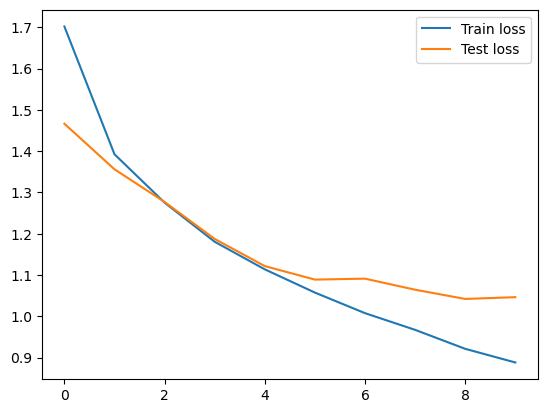

In [23]:
plt.plot(train_losses, label = 'Train loss')
plt.plot(test_losses, label = 'Test loss')
plt.legend()
plt.show()

In [25]:
#Accuracy
model.eval()
n_correct = 0
n_total = 0
for inputs, targets in train_loader:
    #move to cpu
    inputs, targets = inputs.to(device), targets.to(device)
    #zero the gradient
    optimizer.zero_grad()
    #Forward pass
    outputs = model(inputs)

    #get prediction
    #torch.max return both max and argmax
    _, predictions = torch.max(outputs, 1)
    #update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

train_acc = n_correct / n_total

n_correct = 0
n_total = 0
for inputs, targets in train_loader:
    #move data to cpu
    inputs , targets = inputs.to(device), targets.to(device)
    #forward pass
    outputs = model(inputs)
    #get prediction
    #torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)
    #update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]
test_acc = n_correct / n_total
print(f'Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

    

Train Accuracy: 0.6926, Test Accuracy: 0.6915


In [26]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          normalize= False,
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[740  32  46  17  31  10  17  16  74  17]
 [ 24 828   2  11  10   7   7   9  37  65]
 [ 75  10 436  48 190  93  97  30  12   9]
 [ 21  14  76 348 129 236 110  29  19  18]
 [ 20   5  43  45 684  32  97  57  12   5]
 [ 13   7  53 142  89 588  46  39  15   8]
 [  9   9  36  45  80  38 761  12   5   5]
 [ 20   7  32  34 144  93  20 628   6  16]
 [124  57  20  11  19   9  20   6 719  15]
 [ 61 180  10  19  20  11  22  18  45 614]]


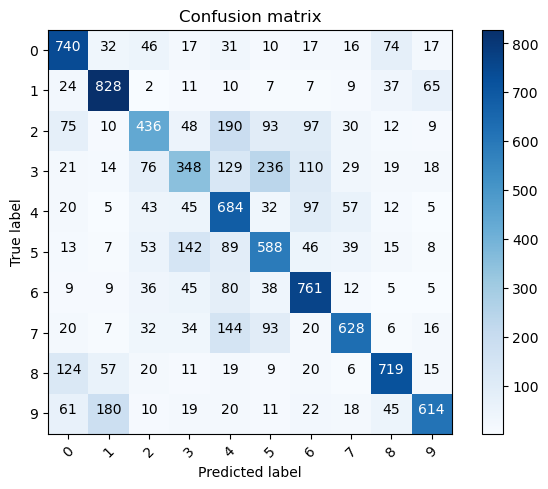

In [28]:
#get all predictions in an array and plot confusion matrix

x_test = test_dataset.data
y_test = np.array(test_dataset.targets)
p_test = np.array([])
for inputs, targets in test_loader:
    #move data to cpu
    inputs, targets = inputs.to(device), targets.to(device)
    #forward pass
    outputs = model(inputs)
    #get prediction
    _, predictions = torch.max(outputs, 1)
    #update p_test
    p_test = np.concatenate((p_test, predictions.cpu().numpy()))
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [29]:
#label mapping
labels = '''airplane
automobile
brid
cat
deer
dog
frog
horse
ship
truck'''.split()

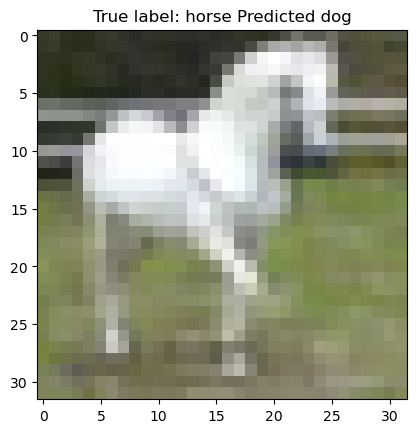

In [45]:
#Show some misclassified examples
p_test = p_test.astype(np.uint8)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32,32,3))
plt.title("True label: %s Predicted %s" % (labels[y_test[i]], labels[p_test[i]]));